In [246]:
import pandas as pd
import numpy as np

In [247]:
#set 1st column as index
file = pd.read_csv('Revised data.csv',index_col=0) 

In [248]:
file.head(5)

,Date,ScheduledStart,ExperimenterLogGender,support.pre,SONAnum,AssignedMedium,ExperiencedMedium,ExperimenterLogAppeal,Experimenter,Confederate,...,gender,genderondemog,medium,asmedium,appeal,all,somesuspicion,nosuspicion,liking,persuasiveness
1.0,10/9/2018,9:30 AM,Male,4.0,2d163,Text,Text,Pathos,Lu/Ayse,Nadav,...,m,m,Text,Text,Pathos,True,True,True,4.666667,2.5
2.0,10/10/2018,10:30 AM,Female,4.0,2d153,Live,Live,Ethos,Lu/Logan,Tamia,...,f,f,Live,Live,Ethos,True,True,True,5.333333,5.0
3.0,10/10/2018,1:15 PM,Female,2.0,2b153,Video,Video,Logos,Lu/Danielle,Tamia,...,f,f,Video,Video,Logos,True,True,True,6.666667,7.0
4.0,10/16/2018,9:30 AM,Male,3.0,2c163,Live,Live,Pathos,Tamia,Nadav,...,m,m,Live,Live,Pathos,True,True,True,4.666667,3.5
5.0,10/16/2018,10:15 AM,Male,2.0,2b163,Live,Live,Pathos,Tamia,Nadav,...,m,m,Live,Live,Pathos,True,True,True,5.333333,3.5


In [251]:
file['post-pre'] = file['support.post'] - file['support.pre']

In [257]:
file['post-pre'].unique()

array([ 1., -2.,  4.,  0.,  2.,  3., -1., -3.,  5.,  6., nan])

In [255]:
file['ExperimenterLogGender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [254]:
#data organizing 
file['ExperimenterLogGender'].loc[file['ExperimenterLogGender'] == 'female'] = 'Female'

In [258]:
#### df: extract fake<>1 data
df = file.loc[file['FakeRatingGoogleDoc']!= 1]

In [259]:
#drop index = NAN 
#df = df.reset_index().dropna().set_index('index')
df = df[df.index.notnull()]

In [261]:
#check df
df.shape

(156, 73)

## Cross tables

In [409]:
t1 = pd.crosstab(df['post-pre'],df['ExperimenterLogGender'],margins=True)
t2 = pd.crosstab(df['post-pre'],df['ExperimenterLogAppeal'],margins=True)
t3 = pd.crosstab(df['post-pre'],df['ExperiencedMedium'],margins=True)
t4 = pd.crosstab(df['persuasive'],df['ExperimenterLogGender'],margins=True)
t5=pd.crosstab(df['strongargument'],df['ExperimenterLogGender'],margins=True) 
t6=pd.crosstab(df['engagingstyle'],df['ExperimenterLogGender'],margins=True)
t7=pd.crosstab(df['tryingpersuade'],df['ExperimenterLogGender'],margins=True) 
t8=pd.crosstab(df['genuineopinion'],df['ExperimenterLogGender'],margins=True) 

table_list=[t1,t2,t3,t4,t5,t6,t7,t8]
for i in table_list:
    print(i)

#write all cross table into excel
## Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('crosstables.xlsx', engine='xlsxwriter')
#
## Write each dataframe to a different worksheet.
#t1.to_excel(writer, sheet_name='Sheet1')
#t2.to_excel(writer, sheet_name='Sheet2')
#t3.to_excel(writer, sheet_name='Sheet3')
#t4.to_excel(writer, sheet_name='Sheet4')
#t5.to_excel(writer, sheet_name='Sheet5')
#t6.to_excel(writer, sheet_name='Sheet6')
#t7.to_excel(writer, sheet_name='Sheet7')
#t8.to_excel(writer, sheet_name='Sheet8')
#
# Close the Pandas Excel writer and output the Excel file.
#writer.save()

ExperimenterLogGender  Female  Male  All
post-pre                                
-3.0                        1     1    2
-2.0                        3     1    4
-1.0                        1     3    4
0.0                        13     8   21
1.0                        20     9   29
2.0                        24    20   44
3.0                        20     6   26
4.0                         7     5   12
5.0                         6     5   11
6.0                         1     2    3
All                        96    60  156
ExperimenterLogAppeal  Ethos  Logos  Pathos  All
post-pre                                        
-3.0                       1      1       0    2
-2.0                       4      0       0    4
-1.0                       2      0       2    4
0.0                        7      5       9   21
1.0                        8      5      16   29
2.0                       12     20      12   44
3.0                       10      6      10   26
4.0                       

## U test

In [353]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**U test 1: male and female's post-pre score**

Gender VS. Post-pre score U-test:  MannwhitneyuResult(statistic=2871.0, pvalue=0.4874161124225903)


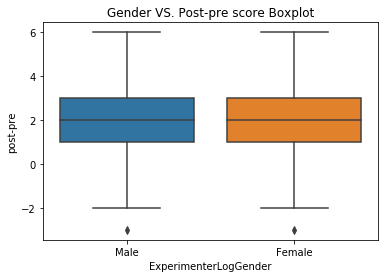

                      post-pre                                             
                         count      mean       std  min  25%  50%  75%  max
ExperimenterLogGender                                                      
Female                    96.0  1.895833  1.688844 -3.0  1.0  2.0  3.0  6.0
Male                      60.0  1.933333  1.894387 -3.0  1.0  2.0  3.0  6.0


In [403]:
df1=df[['post-pre','ExperimenterLogGender']]
#male = df1.loc[df1['ExperimenterLogGender']=='Male']
male = df1['post-pre'][df1.ExperimenterLogGender == 'Male'].values
#male =df1['post-pre'].loc[df1.ExperimenterLogGender == 'Male'].values
female = df1['post-pre'][df1.ExperimenterLogGender == 'Female'].values
print('Gender VS. Post-pre score U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot1=sns.boxplot(y='post-pre',x='ExperimenterLogGender',data=df1)
plt.title('Gender VS. Post-pre score Boxplot')
plt.show()

#descriptive summary
summary1 = df1.groupby('ExperimenterLogGender').describe()
print(summary1)

**U test 2: Log appeal VS. post-pre score**

In [393]:
df['ExperimenterLogAppeal'].unique()

array(['Pathos', 'Ethos', 'Logos'], dtype=object)

Pathos&Ethos VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=1427.5, pvalue=0.4366331506598958)
Logos&Ethos VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=994.5, pvalue=0.05059364198506506)
Pathos&Logos VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=1078.0, pvalue=0.028451081125271827)


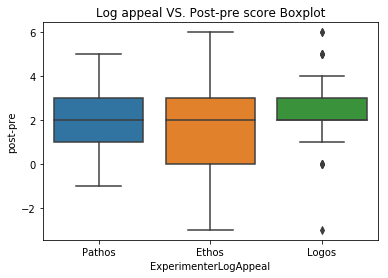

                      post-pre                                             
                         count      mean       std  min  25%  50%  75%  max
ExperimenterLogAppeal                                                      
Ethos                     51.0  1.647059  2.057411 -3.0  0.0  2.0  3.0  6.0
Logos                     48.0  2.354167  1.744165 -3.0  2.0  2.0  3.0  6.0
Pathos                    57.0  1.771930  1.427004 -1.0  1.0  2.0  3.0  5.0


In [389]:
df2=df[['post-pre','ExperimenterLogAppeal']]
pathos=df2['post-pre'][df['ExperimenterLogAppeal']=='Pathos'].values
ethos=df2['post-pre'][df['ExperimenterLogAppeal']=='Ethos'].values
logos=df2['post-pre'][df['ExperimenterLogAppeal']=='Logos'].values

print('Pathos&Ethos VS. Post-pre score U-test: ', stats.mannwhitneyu(pathos,ethos))
print('Logos&Ethos VS. Post-pre score U-test: ', stats.mannwhitneyu(ethos,logos))
print('Pathos&Logos VS. Post-pre score U-test: ', stats.mannwhitneyu(pathos,logos))

#boxplot
plot2=sns.boxplot(y='post-pre',x='ExperimenterLogAppeal',data=df2)
plt.title('Log appeal VS. Post-pre score Boxplot')
plt.show()

#descriptive summary
summary2 = df2.groupby('ExperimenterLogAppeal').describe()
print(summary2)

**U test 3: Mediums VS. post-pre score**

In [395]:
df['ExperiencedMedium'].unique()

array(['Text', 'Live', 'Video'], dtype=object)

Text&Live VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=1384.5, pvalue=0.44999208289480286)
Text&Video VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=1156.5, pvalue=0.12911365578599737)
Video&Live VS. Post-pre score Boxplot U-test:  MannwhitneyuResult(statistic=1184.5, pvalue=0.17344472762034968)


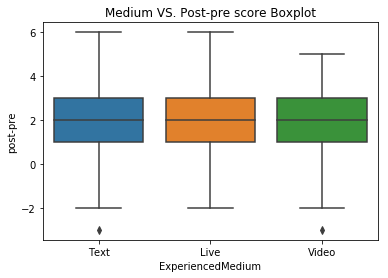

                  post-pre                                             
                     count      mean       std  min  25%  50%  75%  max
ExperiencedMedium                                                      
Live                  53.0  1.905660  1.723861 -2.0  1.0  2.0  3.0  6.0
Text                  53.0  1.754717  1.807098 -3.0  1.0  2.0  3.0  6.0
Video                 50.0  2.080000  1.782454 -3.0  1.0  2.0  3.0  5.0


In [399]:
df3=df[['post-pre','ExperiencedMedium']]
text=df3['post-pre'].loc[df['ExperiencedMedium']=='Text'].values
live=df3['post-pre'].loc[df['ExperiencedMedium']=='Live'].values
video=df3['post-pre'].loc[df['ExperiencedMedium']=='Video'].values

print('Text&Live VS. Post-pre score U-test: ', stats.mannwhitneyu(text,live))
print('Text&Video VS. Post-pre score U-test: ', stats.mannwhitneyu(text,video))
print('Video&Live VS. Post-pre score U-test: ', stats.mannwhitneyu(video,live))

#boxplot
plot3=sns.boxplot(y='post-pre',x='ExperiencedMedium',data=df3)
plt.title('Medium VS. Post-pre score Boxplot')
plt.show()

#descriptive summary
summary3 = df3.groupby('ExperiencedMedium').describe()
print(summary3)


**U test 4: Persuasiveness VS. Gender**

Gender VS. Persuasive U-test:  MannwhitneyuResult(statistic=2354.5, pvalue=0.023867049466523668)


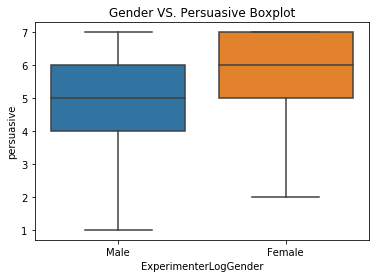

                      persuasive                                             
                           count      mean       std  min  25%  50%  75%  max
ExperimenterLogGender                                                        
Female                      96.0  5.656250  1.221114  2.0  5.0  6.0  7.0  7.0
Male                        60.0  5.166667  1.520110  1.0  4.0  5.0  6.0  7.0


In [400]:
df4=df[['persuasive','ExperimenterLogGender']]
male = df4['persuasive'][df4.ExperimenterLogGender == 'Male'].values
female = df4['persuasive'][df4.ExperimenterLogGender == 'Female'].values
print('Gender VS. Persuasive U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot4=sns.boxplot(y='persuasive',x='ExperimenterLogGender',data=df4)
plt.title('Gender VS. Persuasive Boxplot')
plt.show()

#descriptive summary
summary4 = df4.groupby('ExperimenterLogGender').describe()
print(summary4)

**U test 5: Strong argument VS. Gender**

Gender VS. Strong argument U-test:  MannwhitneyuResult(statistic=2380.0, pvalue=0.029950697063402053)


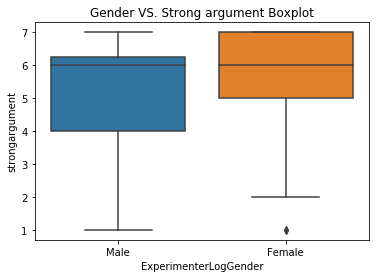

                      strongargument                                           \
                               count      mean       std  min  25%  50%   75%   
ExperimenterLogGender                                                           
Female                          96.0  5.708333  1.435759  1.0  5.0  6.0  7.00   
Male                            60.0  5.216667  1.688362  1.0  4.0  6.0  6.25   

                            
                       max  
ExperimenterLogGender       
Female                 7.0  
Male                   7.0  


In [404]:
df5=df[['strongargument','ExperimenterLogGender']]
male = df5['strongargument'][df5.ExperimenterLogGender == 'Male'].values
female = df5['strongargument'][df5.ExperimenterLogGender == 'Female'].values
print('Gender VS. Strong argument U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot5=sns.boxplot(y='strongargument',x='ExperimenterLogGender',data=df5)
plt.title('Gender VS. Strong argument Boxplot')
plt.show()

#descriptive summary
summary5 = df5.groupby('ExperimenterLogGender').describe()
print(summary5)

**U test 6: Engaging style VS. Gender**

Gender VS. Engaging style U-test:  MannwhitneyuResult(statistic=1745.0, pvalue=1.1649027258272846e-05)


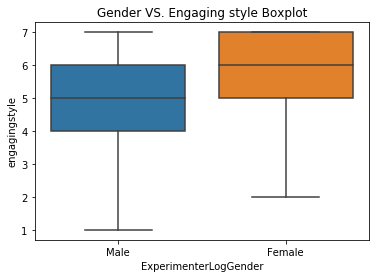

                      engagingstyle                                          \
                              count      mean       std  min  25%  50%  75%   
ExperimenterLogGender                                                         
Female                         96.0  5.572917  1.359139  2.0  5.0  6.0  7.0   
Male                           60.0  4.516667  1.589069  1.0  4.0  5.0  6.0   

                            
                       max  
ExperimenterLogGender       
Female                 7.0  
Male                   7.0  


In [405]:
df6=df[['engagingstyle','ExperimenterLogGender']]
male = df6['engagingstyle'][df6.ExperimenterLogGender == 'Male'].values
female = df6['engagingstyle'][df6.ExperimenterLogGender == 'Female'].values
print('Gender VS. Engaging style U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot6=sns.boxplot(y='engagingstyle',x='ExperimenterLogGender',data=df6)
plt.title('Gender VS. Engaging style Boxplot')
plt.show()

#descriptive summary
summary6 = df6.groupby('ExperimenterLogGender').describe()
print(summary6)

**U test 7: Trying persuade VS. Gender**

Gender VS.Trying persuade U-test:  MannwhitneyuResult(statistic=2457.0, pvalue=0.058200933834540836)


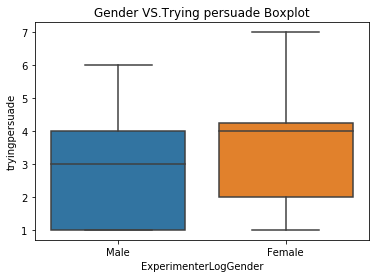

                      tryingpersuade                                           \
                               count      mean       std  min  25%  50%   75%   
ExperimenterLogGender                                                           
Female                          96.0  3.375000  1.718322  1.0  2.0  4.0  4.25   
Male                            60.0  2.933333  1.571641  1.0  1.0  3.0  4.00   

                            
                       max  
ExperimenterLogGender       
Female                 7.0  
Male                   6.0  


In [406]:
df7=df[['tryingpersuade','ExperimenterLogGender']]
male = df7['tryingpersuade'][df7.ExperimenterLogGender == 'Male'].values
female = df7['tryingpersuade'][df7.ExperimenterLogGender == 'Female'].values
print('Gender VS.Trying persuade U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot7=sns.boxplot(y='tryingpersuade',x='ExperimenterLogGender',data=df7)
plt.title('Gender VS.Trying persuade Boxplot')
plt.show()

#descriptive summary
summary7 = df7.groupby('ExperimenterLogGender').describe()
print(summary7)

**U test 8: Genuine opinion VS. Gender**

Gender VS.Genuine opinion U-test:  MannwhitneyuResult(statistic=1728.5, pvalue=5.275360635154366e-06)


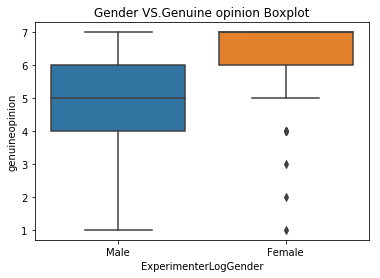

                      genuineopinion                                          \
                               count      mean       std  min  25%  50%  75%   
ExperimenterLogGender                                                          
Female                          96.0  6.187500  1.145357  1.0  6.0  7.0  7.0   
Male                            60.0  5.216667  1.552381  1.0  4.0  5.0  6.0   

                            
                       max  
ExperimenterLogGender       
Female                 7.0  
Male                   7.0  


In [408]:
df8=df[['genuineopinion','ExperimenterLogGender']]
male = df8['genuineopinion'][df8.ExperimenterLogGender == 'Male'].values
female = df8['genuineopinion'][df8.ExperimenterLogGender == 'Female'].values
print('Gender VS.Genuine opinion U-test: ', stats.mannwhitneyu(male,female))

#boxplot
plot8=sns.boxplot(y='genuineopinion',x='ExperimenterLogGender',data=df8)
plt.title('Gender VS.Genuine opinion Boxplot')
plt.show()

#descriptive summary
summary8 = df8.groupby('ExperimenterLogGender').describe()
print(summary8)

## Descriptive Statistics for Birth, Race, and What-year

In [522]:
df_person=df[['Q23_1','Q23_4','Q25','Q26']]
df_person.columns = ['Birth','Race','Race2','WhatYear']

**Birth statistics**

In [523]:
df_person['Birth'].unique()

array(['1999', '1998', '2000', '1997', '7/4/2000', '1996', '1995', '199',
       '98', '11/27/1999', '1999,8,9'], dtype=object)

In [524]:
#drop error birth year data
df_person1 = df_person[df_person.Birth != '199']
df_person1['Birth'][df_person1['Birth']=='7/4/2000']='2000'
df_person1['Birth'][df_person1['Birth']=='98']='1998'
df_person1['Birth'][df_person1['Birth']=='11/27/1999']='1999'
df_person1['Birth'][df_person1['Birth']=='1999,8,9']='1999'

2000    70
1999    55
1998    19
1997     7
1995     2
1996     2
Name: Birth, dtype: int64


Text(0.5, 1.0, 'Frequence Table of Birth Year')

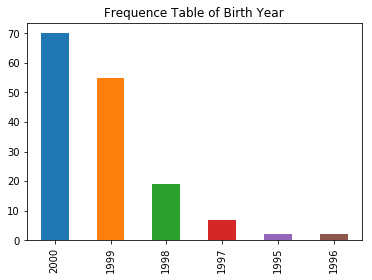

In [525]:
print(df_person1['Birth'].value_counts())
df_person1['Birth'].value_counts().plot(kind='bar')
#ax = sns.countplot(x="class", hue="who", data=titanic)
plt.title('Frequence Table of Birth Year')

**Race**

In [526]:
df_person['Race2'].unique()

array(['3', '4', '5', '1', '6', '9', '2', '1,3', '7', '2,3', '4,5',
       '2,3,8', '1,2'], dtype=object)

In [527]:
pd.set_option('mode.chained_assignment', None)
df_person['Race2'][df_person['Race2']== '1'] = 'Black or African American'
df_person['Race2'][df_person['Race2']== '2'] = 'Hispanic or Latino'
df_person['Race2'][df_person['Race2']== '3'] = 'White or Caucasian'
df_person['Race2'][df_person['Race2']== '4'] = 'East Asian'
df_person['Race2'][df_person['Race2']== '5'] = 'South Asian'
df_person['Race2'][df_person['Race2']== '6'] = 'Middle Eastern'
df_person['Race2'][df_person['Race2']== '7'] = 'Arab or Arab American'
df_person['Race2'][df_person['Race2']== '9'] = 'Native Hawaiian or Pacific Islander'
df_person['Race2'][df_person['Race2']== '1,3'] = 'Other'
df_person['Race2'][df_person['Race2']== '2,3'] = 'Other'
df_person['Race2'][df_person['Race2']== '4,5'] = 'Other'
df_person['Race2'][df_person['Race2']== '2,3,8'] = 'Other'
df_person['Race2'][df_person['Race2']== '1,2'] = 'Other'

White or Caucasian                     83
East Asian                             30
Black or African American              12
Hispanic or Latino                      9
South Asian                             7
Other                                   7
Native Hawaiian or Pacific Islander     4
Middle Eastern                          3
Arab or Arab American                   1
Name: Race2, dtype: int64


Text(0.5, 1.0, 'Frequence Table of Birth Year')

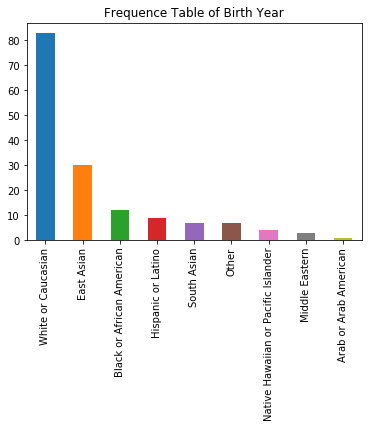

In [528]:
print(df_person['Race2'].value_counts())
df_person['Race2'].value_counts().plot(kind='bar')
#ax = sns.countplot(x="class", hue="who", data=titanic)
plt.title('Frequence Table of Birth Year')

**What year**

In [543]:
df_person['WhatYear'].unique()

array(['Freshman', 2.0, 4.0, 3.0], dtype=object)

In [547]:
freshman = df_person['WhatYear']== 1.0
Sophomore = df_person['WhatYear']== 2.0
Junior = df_person['WhatYear']== 3.0
Senior = df_person['WhatYear']== 4.0

df_person['WhatYear'][freshman]='Freshman'
df_person['WhatYear'][Sophomore] = 'Sophomore'
df_person['WhatYear'][Junior] = 'Junior'
df_person['WhatYear'][Senior] = 'Senior'

In [548]:
df_person['WhatYear'].unique()

array(['Freshman', 'Sophomore', 'Senior', 'Junior'], dtype=object)

Freshman     108
Sophomore     29
Junior        10
Senior         9
Name: WhatYear, dtype: int64


Text(0.5, 1.0, 'Frequence Table of What-year')

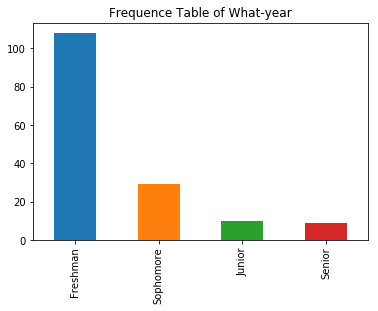

In [550]:
print(df_person['WhatYear'].value_counts())
df_person['WhatYear'].value_counts().plot(kind='bar')
#ax = sns.countplot(x="class", hue="who", data=titanic)
plt.title('Frequence Table of What-year')